## Problem 1 : Analysis of Numeric Variables

**Extract the following Numeric variables from the dataset, and store as a new Pandas DataFrame.**

**houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])**

a) Check the individual statistical description and visualize the statistical distributions of each of these variables.

b) Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the
“skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?

c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment
which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”?

d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of
the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?

In [20]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [21]:
houseData = pd.read_csv("train.csv")
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

**a) Check the individual statistical description and visualize the statistical distributions of each of these variables.**

In [22]:
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


In [23]:
houseNumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


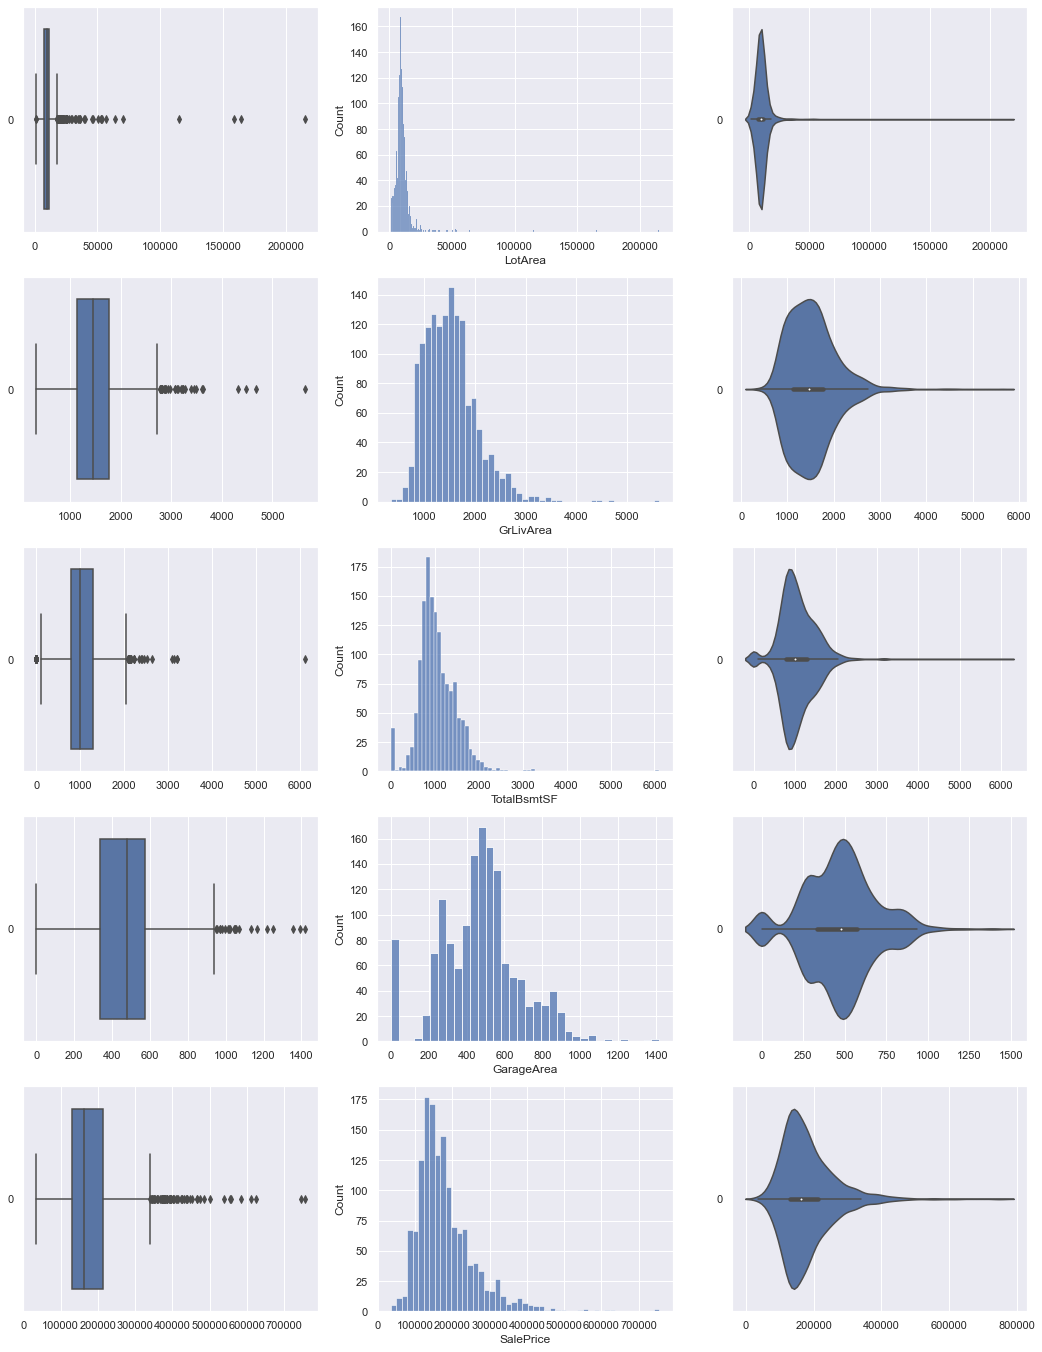

In [24]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0;

for var in houseNumData:
    sb.boxplot(data=houseNumData[var], orient="h", ax=axes[count, 0])
    sb.histplot(data=houseNumData[var], ax=axes[count, 1])
    sb.violinplot(data=houseNumData[var], orient="h", ax=axes[count,2])
    count+=1

**b) Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the “skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?**

In [25]:
houseNumData.skew(axis=0, skipna = True)

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [26]:
# Calculate the quartiles
Q1 = houseNumData.quantile(0.25)
Q3 = houseNumData.quantile(0.75)

# Rule to identify outliers
rule = ((houseNumData < (Q1 - 1.5 * (Q3 - Q1))) | (houseNumData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

**c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”?**

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

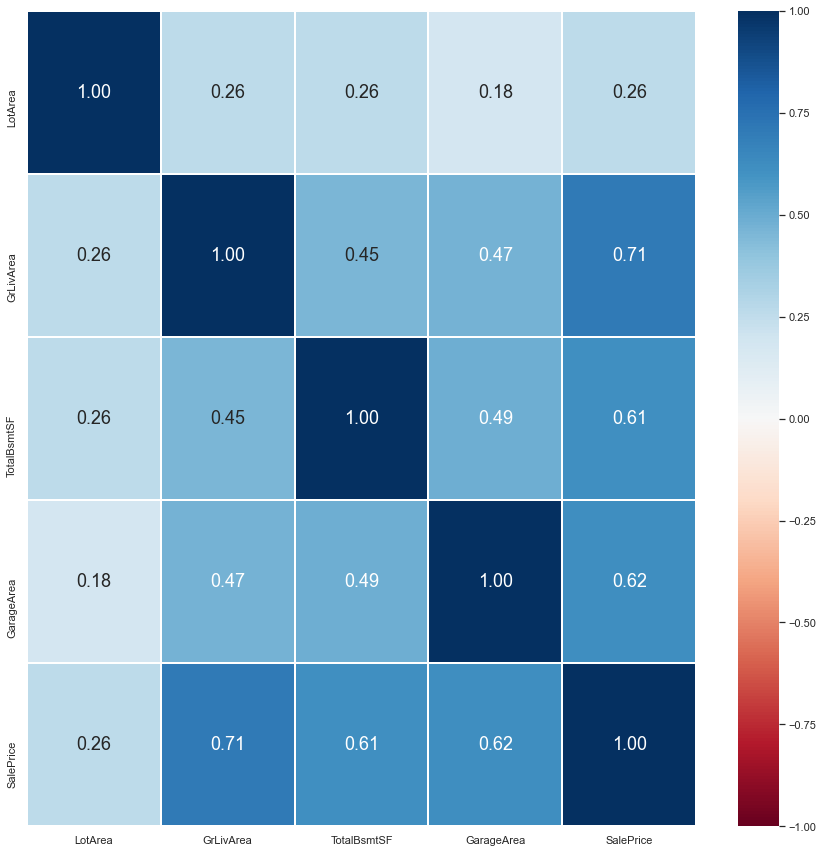

In [27]:
print(houseNumData.corr())

f = plt.figure(figsize=(15,15))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1, 
           annot = True, fmt = '.2f', annot_kws = {"size": 18}, cmap = "RdBu")

GrLivArea and SalePrice has the highest correlation(0.71)

**d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of
the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?**

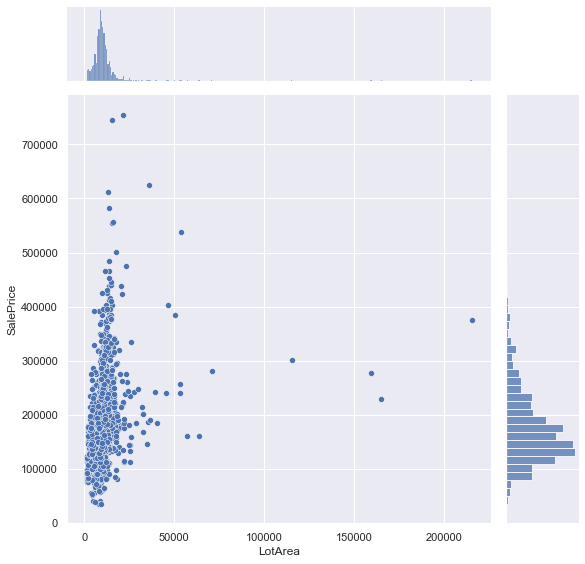

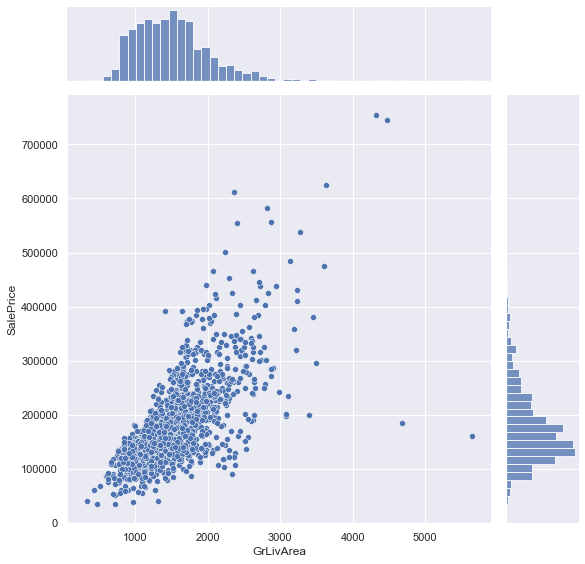

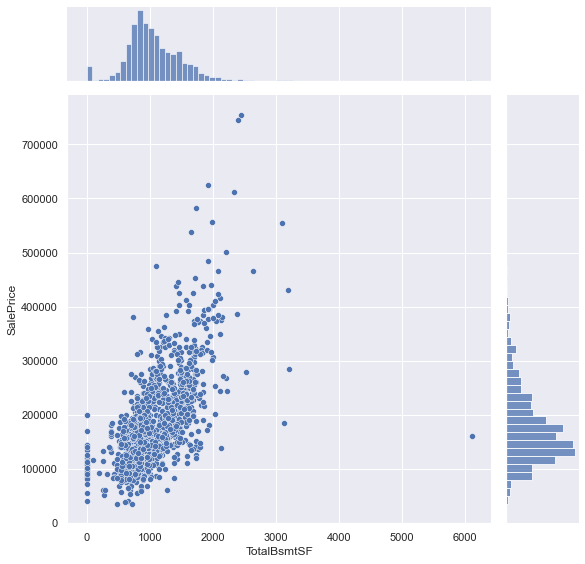

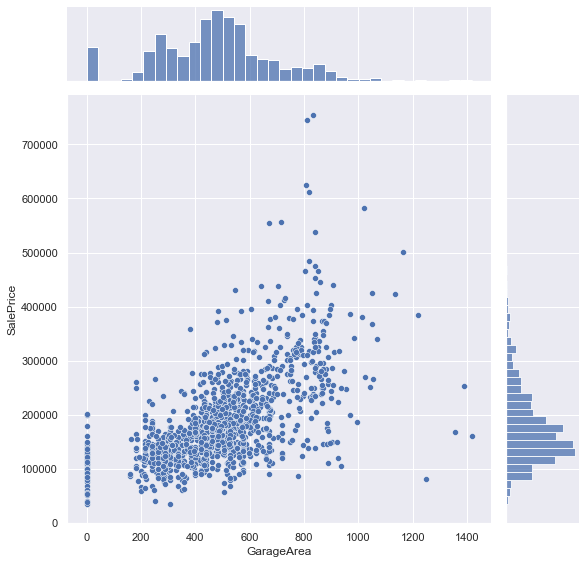

In [28]:
for var in ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']:  
    sb.jointplot(data = houseNumData, x = var, y = "SalePrice", height = 8)

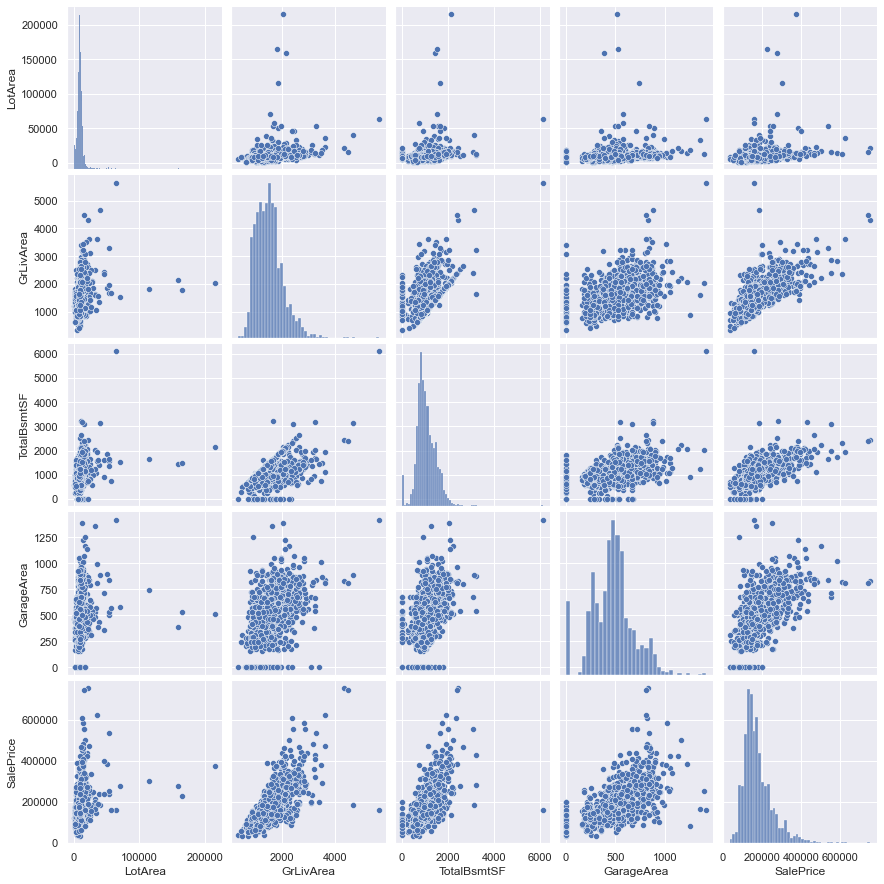

In [29]:
sb.pairplot(data = houseNumData)

## Problem 2 : Analysis of Categorical Variables

**Extract the following Categorical variables from the dataset, and store as a new Pandas DataFrame.
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])**

a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

c) One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts.
Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables.
Comment if this is useful in identifying the relation between “OverallQual” with the other variables.

d) Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots.
Comment on which of these variables has the most influence in predicting “SalePrice”.

In [30]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

**a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).**

In [31]:
print(houseCatData.dtypes)

MSSubClass       int64
Neighborhood    object
BldgType        object
OverallQual      int64
dtype: object


In [32]:
for var in['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']:
    houseCatData[var] = houseCatData[var].astype('category')

**b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.**


In [33]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 8.0 KB


In [34]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


C:\Users\Ying Xuan\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\Ying Xuan\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\Ying Xuan\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
C:\Users\Ying Xuan\anaconda3\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


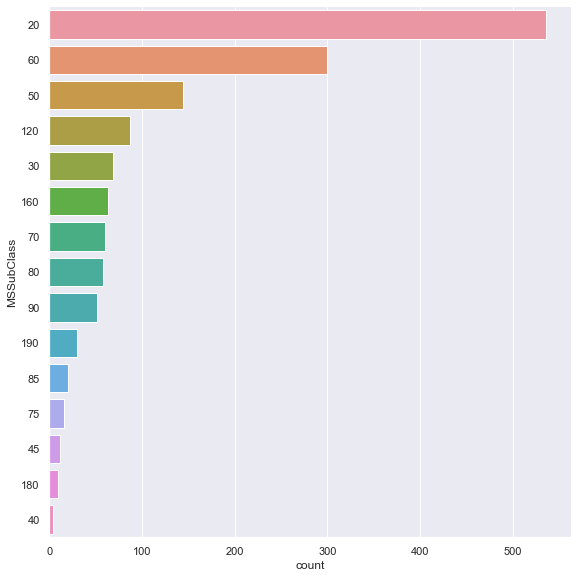

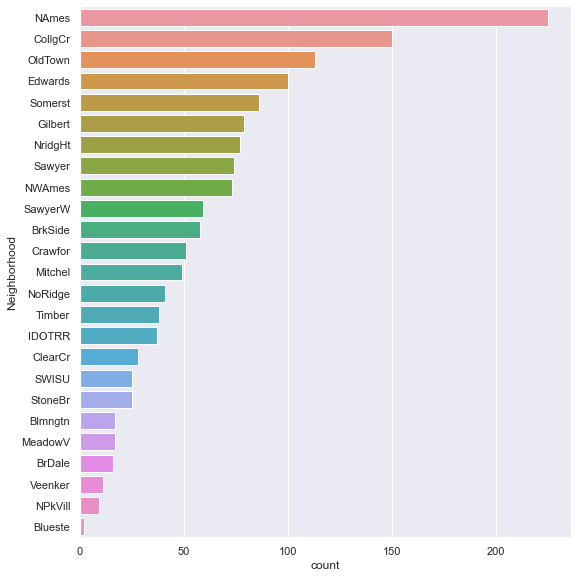

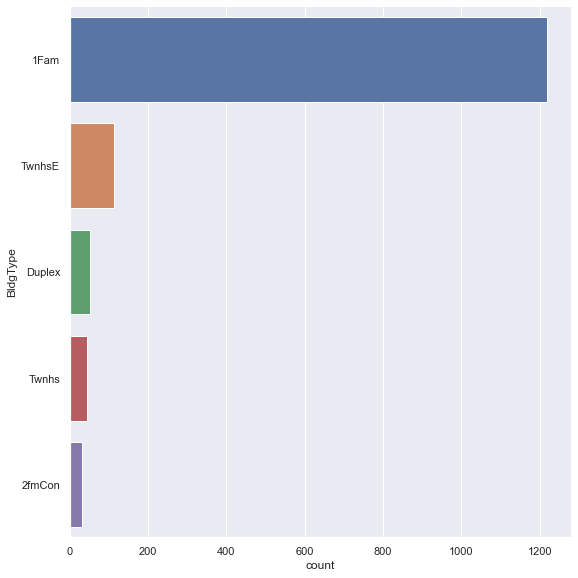

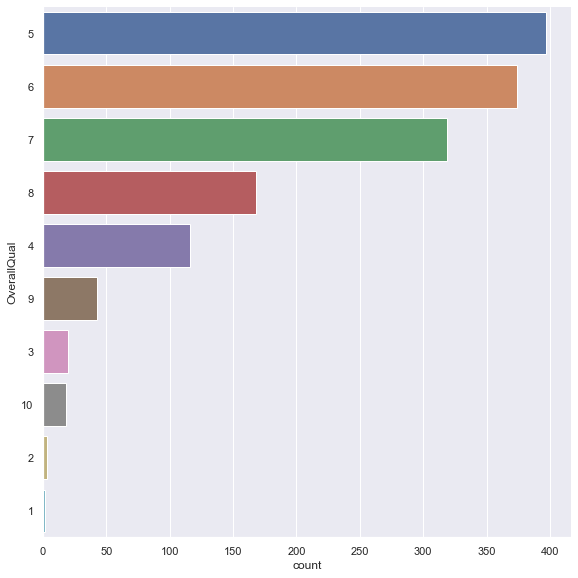

In [35]:
c = 0
for var in houseCatData:
    sb.catplot(y = var, data = houseCatData, kind = "count",
           order = houseCatData[var].value_counts().index, height = 8, ax = axes[c])
    c += 1

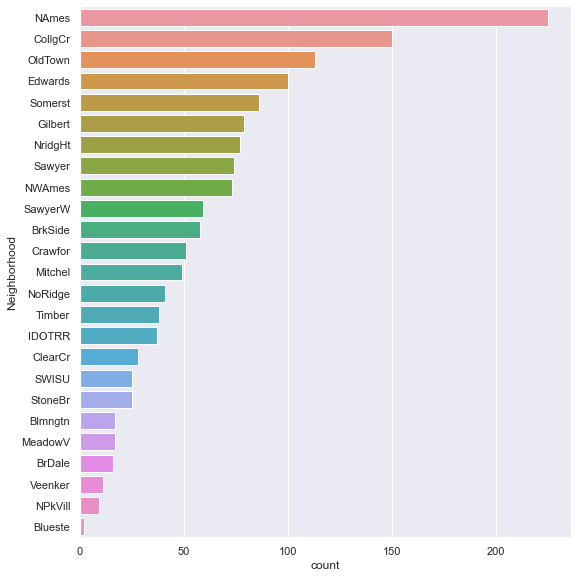

In [36]:
sb.catplot(y = "Neighborhood", data = houseCatData, kind = "count",
           order = houseCatData["Neighborhood"].value_counts().index, height = 8)

c) One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts.
Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables.
Comment if this is useful in identifying the relation between “OverallQual” with the other variables.

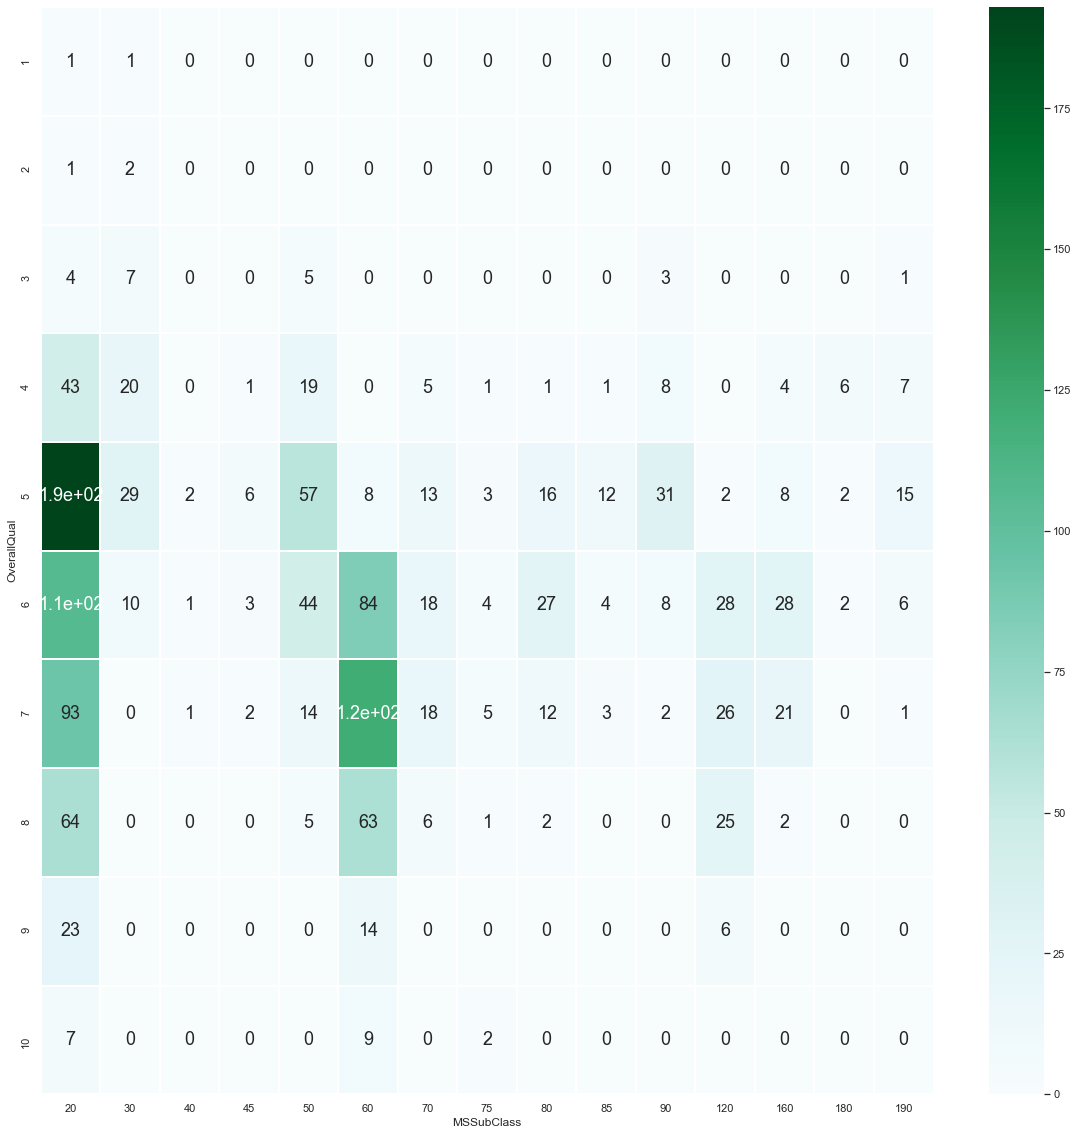

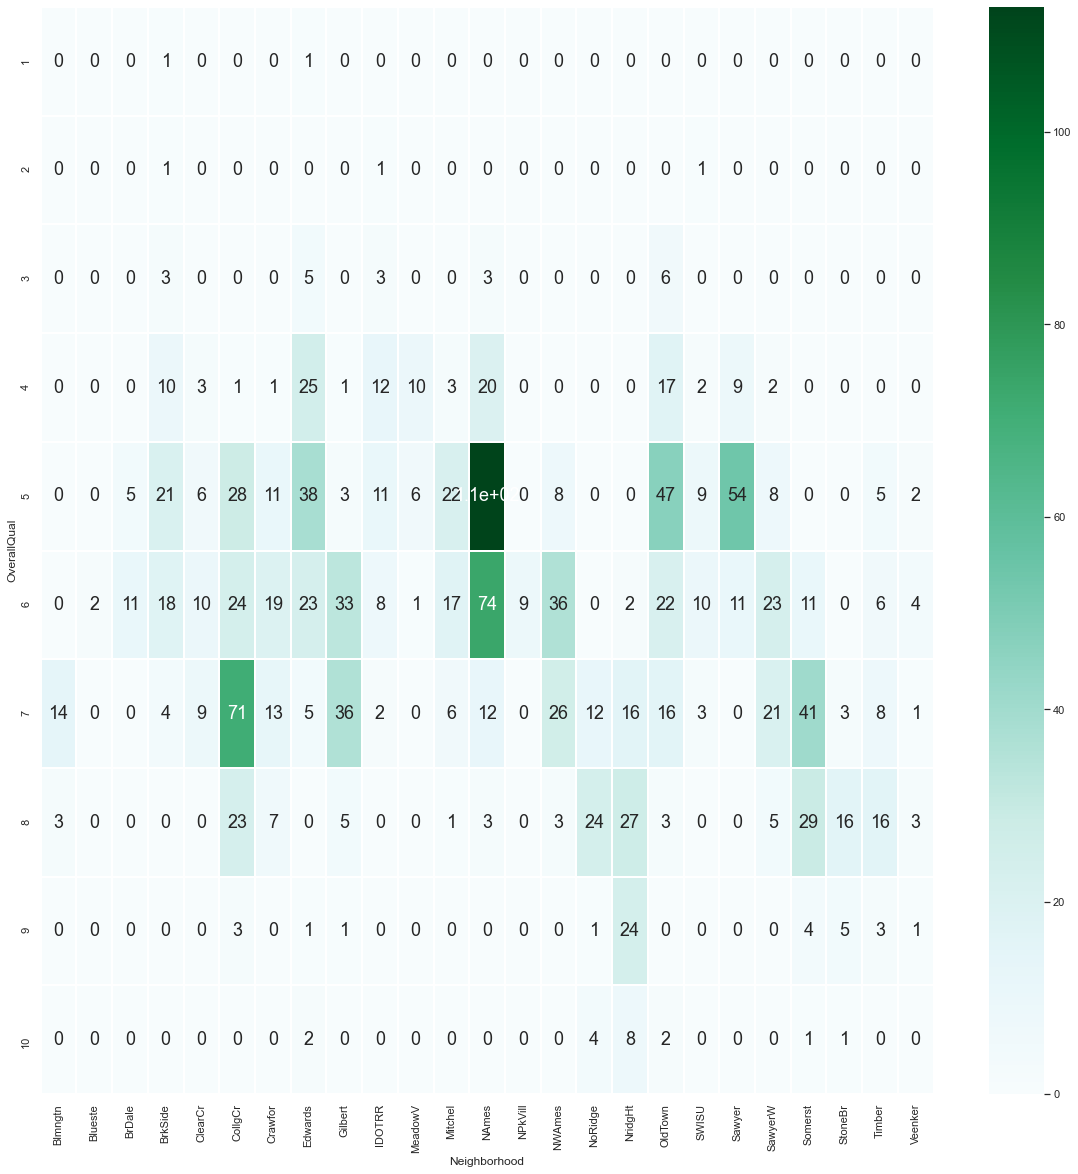

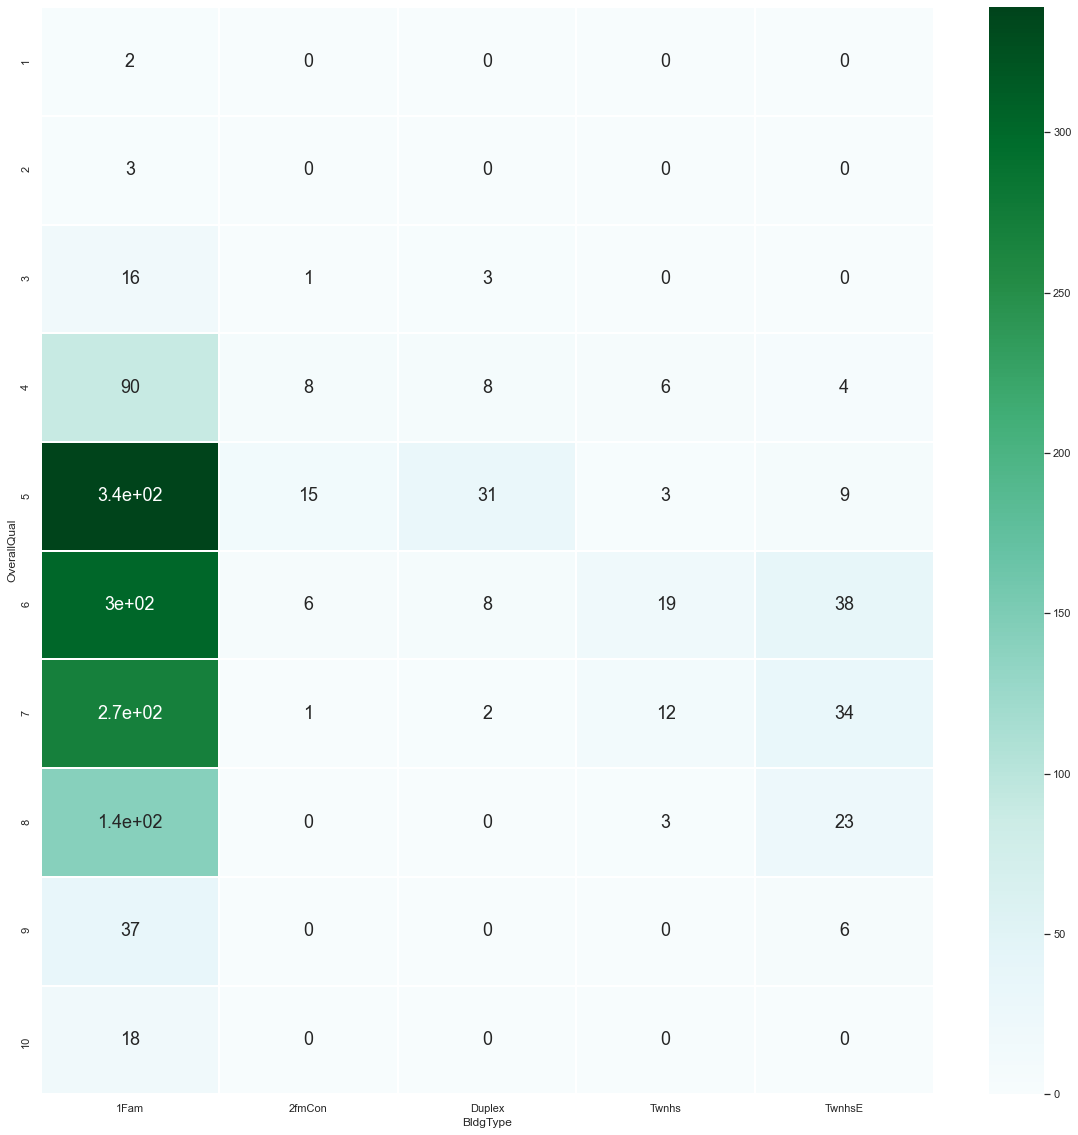

In [37]:
for var in ['MSSubClass', 'Neighborhood', 'BldgType']:
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(houseCatData.groupby(['OverallQual', var]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

d) Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots.
Comment on which of these variables has the most influence in predicting “SalePrice”.

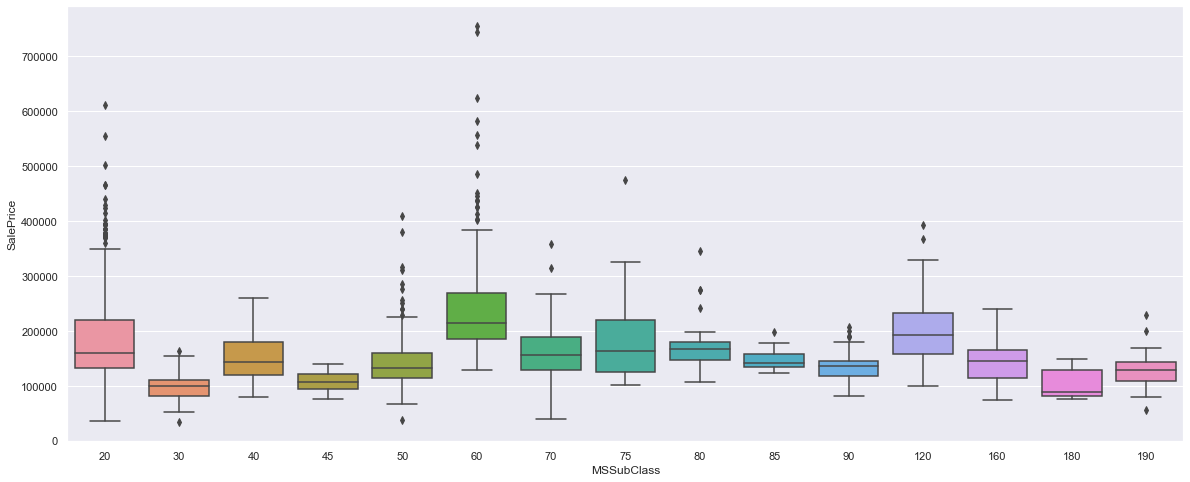

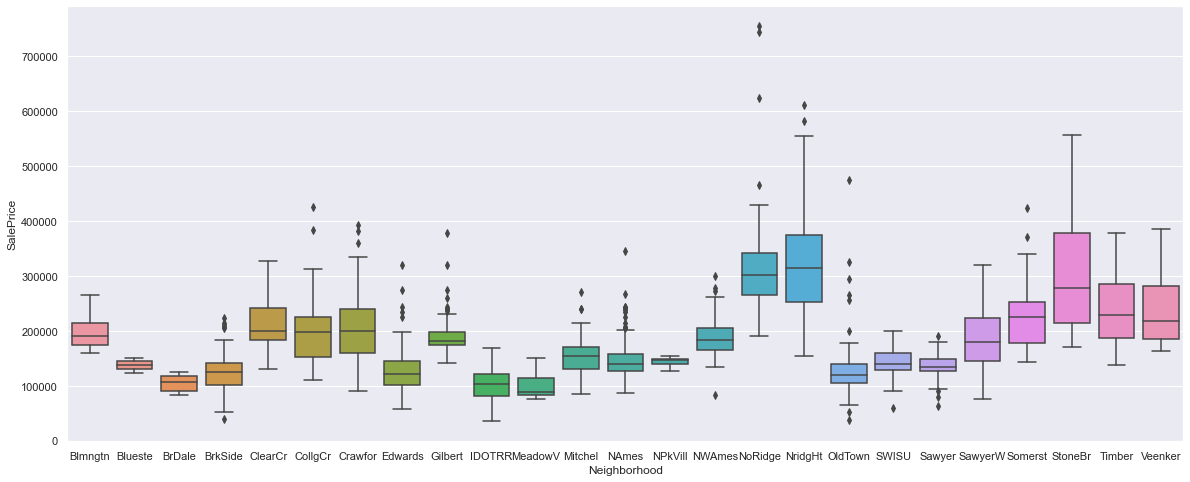

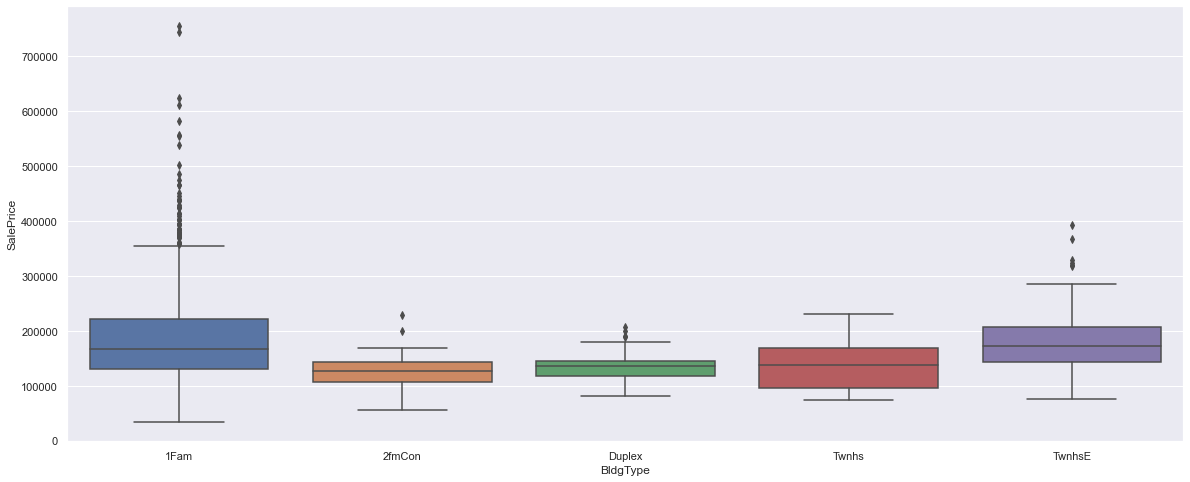

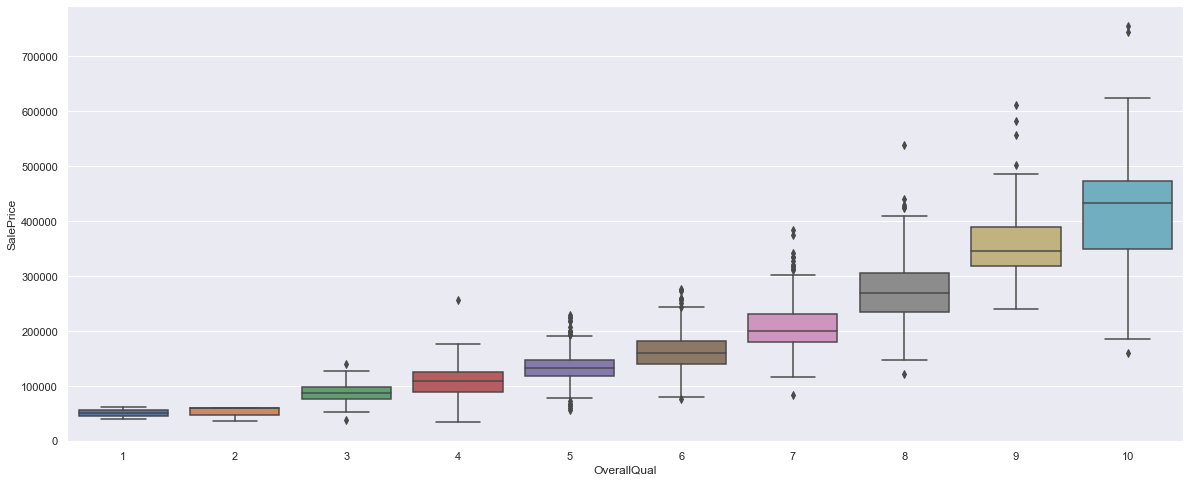

In [38]:
for var in ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']:
    f = plt.figure(figsize = (20, 8))
    sb.boxplot(x = var, y = houseNumData["SalePrice"], data = houseCatData)

**Observation : Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` across the levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` across the levels   

Bonus : Attempt a comprehensive analysis with all *Categorical* variables in the dataset.